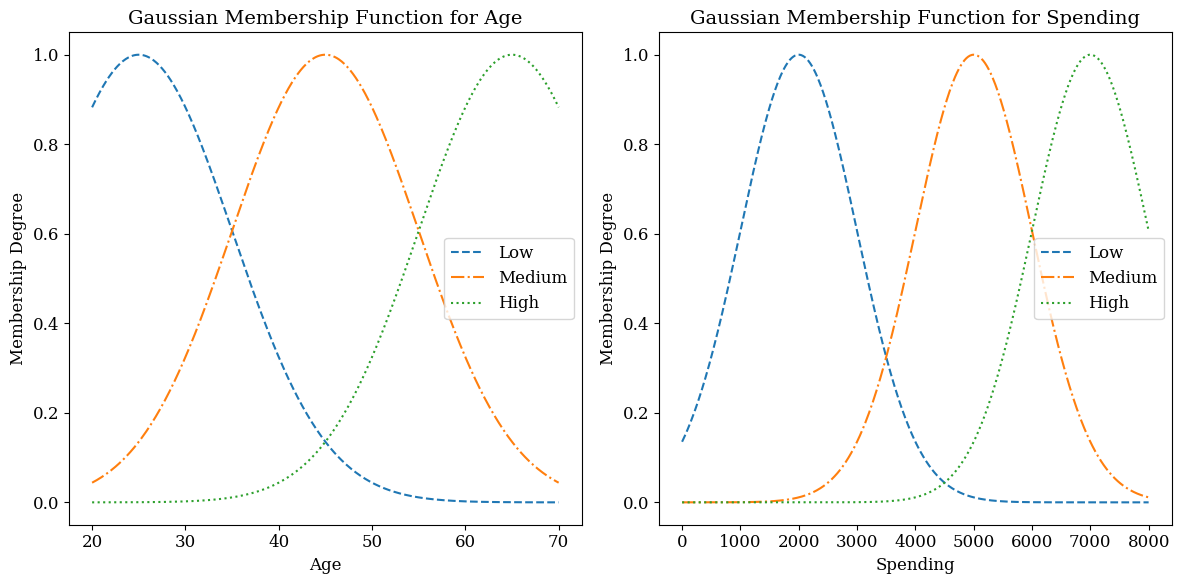

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining Gaussian membership functions for Age and Spending
def gaussian_mf(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)

# Define ranges for Age and Spending
age_range = np.linspace(20, 70, 500)  # Age range from 20 to 70
spending_range = np.linspace(0, 8000, 500)  # Spending range from 0 to 8000

# Defining means and standard deviations for Gaussian functions
age_low_mean, age_low_sigma = 25, 10
age_medium_mean, age_medium_sigma = 45, 10
age_high_mean, age_high_sigma = 65, 10

spending_low_mean, spending_low_sigma = 2000, 1000
spending_medium_mean, spending_medium_sigma = 5000, 1000
spending_high_mean, spending_high_sigma = 7000, 1000

# Calculate Gaussian membership values for Age
age_low = gaussian_mf(age_range, age_low_mean, age_low_sigma)
age_medium = gaussian_mf(age_range, age_medium_mean, age_medium_sigma)
age_high = gaussian_mf(age_range, age_high_mean, age_high_sigma)

# Calculate Gaussian membership values for Spending
spending_low = gaussian_mf(spending_range, spending_low_mean, spending_low_sigma)
spending_medium = gaussian_mf(spending_range, spending_medium_mean, spending_medium_sigma)
spending_high = gaussian_mf(spending_range, spending_high_mean, spending_high_sigma)

# Plotting the Gaussian Membership Functions with professional styling
plt.figure(figsize=(12, 6))

# Font style for a professional look
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})

plt.subplot(1, 2, 1)
plt.plot(age_range, age_low, label='Low', linestyle='--', linewidth=1.5)
plt.plot(age_range, age_medium, label='Medium', linestyle='-.', linewidth=1.5)
plt.plot(age_range, age_high, label='High', linestyle=':', linewidth=1.5)
plt.title('Gaussian Membership Function for Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Membership Degree', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(spending_range, spending_low, label='Low', linestyle='--', linewidth=1.5)
plt.plot(spending_range, spending_medium, label='Medium', linestyle='-.', linewidth=1.5)
plt.plot(spending_range, spending_high, label='High', linestyle=':', linewidth=1.5)
plt.title('Gaussian Membership Function for Spending', fontsize=14)
plt.xlabel('Spending', fontsize=12)
plt.ylabel('Membership Degree', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# df = pd.read_csv(r'Customer-Churn-Records.csv')

df_train = pd.read_csv('Data/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')

subscription_map = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df_train['Subscription Type'] = df_train['Subscription Type'].map(subscription_map)
df_test['Subscription Type'] = df_test['Subscription Type'].map(subscription_map)

contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df_train['Contract Length'] = df_train['Contract Length'].map(contract_map)
df_test['Contract Length'] = df_test['Contract Length'].map(contract_map)

gender_map = {'Male': 0, 'Female': 1}
df_train['Gender'] = df_train['Gender'].map(gender_map)
df_test['Gender'] = df_test['Gender'].map(gender_map)

print("NaN counts:\n", df_train.isna().sum())
# print("NaN counts:\n", df_test.isna().sum())

df_train = df_train.dropna()
df_test = df_test.dropna()

print("NaN counts:\n", df_train.isna().sum())
print("NaN counts:\n", df_test.isna().sum())

y_train, y_test = df_train['Churn'], df_test['Churn']
X_train = df_train.drop(['Churn', 'CustomerID'], axis=1)
X_test = df_test.drop(['Churn', 'CustomerID'], axis=1)

# df = pd.DataFrame(df)
# label_encoder = LabelEncoder()




NaN counts:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  float64
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  float64
 8   Contract Length    440832 non-null  float64
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(12)
memory usage: 43.7 MB


In [6]:
X_train

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,1.0,39.0,14.0,5.0,18.0,1.0,12.0,932.00,17.0
1,65.0,1.0,49.0,1.0,10.0,8.0,0.0,1.0,557.00,6.0
2,55.0,1.0,14.0,4.0,6.0,18.0,0.0,3.0,185.00,3.0
3,58.0,0.0,38.0,21.0,7.0,7.0,1.0,1.0,396.00,29.0
4,23.0,0.0,32.0,20.0,5.0,8.0,0.0,1.0,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,0.0,54.0,15.0,1.0,3.0,2.0,12.0,716.38,8.0
440829,25.0,1.0,8.0,13.0,1.0,20.0,2.0,12.0,745.38,2.0
440830,26.0,0.0,35.0,27.0,1.0,5.0,1.0,3.0,977.31,9.0
440831,28.0,0.0,55.0,14.0,2.0,0.0,1.0,3.0,602.55,2.0


In [7]:
import scipy.stats as stats

# Shapiro-Wilk test
for column in df_train.columns:
    _, p_value  = stats.shapiro(df_train[column])
    if p_value > 0.05:
        print(f"{column} seems to be normally distributed (p={p_value:.2f})")
    else:
        print(f"{column} does not seem to be normally distributed (p={p_value:.2f})")

CustomerID does not seem to be normally distributed (p=0.00)
Age does not seem to be normally distributed (p=0.00)
Gender does not seem to be normally distributed (p=0.00)
Tenure does not seem to be normally distributed (p=0.00)
Usage Frequency does not seem to be normally distributed (p=0.00)
Support Calls does not seem to be normally distributed (p=0.00)
Payment Delay does not seem to be normally distributed (p=0.00)
Subscription Type does not seem to be normally distributed (p=0.00)
Contract Length does not seem to be normally distributed (p=0.00)
Total Spend does not seem to be normally distributed (p=0.00)
Last Interaction does not seem to be normally distributed (p=0.00)
Churn does not seem to be normally distributed (p=0.00)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 440832.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
import numpy as np
import optuna
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, confusion_matrix, classification_report, roc_auc_score)
from imblearn.over_sampling import SMOTE

# 記錄整個運行開始時間
overall_start_time = time.time()


# 分割訓練和測試集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 應用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

def objective(trial):
    """Optuna 目標函數，用於尋找最佳超參數。"""
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_prob)

# 記錄超參數搜索開始時間
start_time = time.time()

# 設定 Optuna 進行超參數搜尋
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # 設定嘗試 50 次

# 記錄超參數搜索結束時間
end_time = time.time()

# 計算超參數搜索運行時間
total_time = end_time - start_time
print(f"超參數搜索運行時間: {total_time:.2f} 秒")

# 獲取最佳超參數
best_params = study.best_params
print("最佳超參數:", best_params)

# 使用最佳超參數重新訓練模型
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_model.fit(X_resampled, y_resampled)

# 進行預測
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 計算指標
auc_score = roc_auc_score(y_test, y_prob)
print("AUC:", auc_score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 記錄整個運行結束時間
overall_end_time = time.time()

# 計算整個運行時間
overall_total_time = overall_end_time - overall_start_time
print(f"整個運行時間: {overall_total_time:.2f} 秒")


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-06-25 20:04:03,242] A new study created in memory with name: no-name-80c894d3-faf8-45ea-83e7-34ff5baad5ff
[I 2025-06-25 20:06:23,018] Trial 0 finished with value: 0.6261444983306914 and parameters: {'n_estimators': 350, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 19}. Best is trial 0 with value: 0.6261444983306914.
[I 2025-06-25 20:07:00,493] Trial 1 finished with value: 0.7646952239997081 and parameters: {'n_estimators': 178, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.7646952239997081.
[I 2025-06-25 20:08:22,108] Trial 2 finished with value: 0.5937927733089607 and parameters: {'n_estimators': 145, 'max_depth': 43, 'min_samples_split': 

KeyboardInterrupt: 

In [9]:
import numpy as np
import optuna
import time
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, confusion_matrix, classification_report, roc_auc_score)
from imblearn.over_sampling import SMOTE

# 記錄整個運行開始時間
overall_start_time = time.time()


# 分割訓練和測試集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 應用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 計算 scale_pos_weight
#scale_pos_weight = sum(y_resampled == 0) / sum(y_resampled == 1)

def objective(trial):
    """Optuna 目標函數，用於尋找最佳超參數。"""
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)

    model = xgb.XGBClassifier(
        objective='binary:logistic',
       # scale_pos_weight=scale_pos_weight,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        verbosity=0,
        use_label_encoder=False
    )

    model.fit(X_resampled, y_resampled)
    y_prob = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_prob)



# 設定 Optuna 進行超參數搜尋
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # 設定嘗試 50 次

# 記錄超參數搜索結束時間
end_time = time.time()

# 計算超參數搜索運行時間
total_time = end_time - start_time
print(f"超參數搜索運行時間: {total_time:.2f} 秒")

# 獲取最佳超參數
best_params = study.best_params
print("最佳超參數:", best_params)

# 使用最佳超參數重新訓練模型
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    #scale_pos_weight=scale_pos_weight,
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    verbosity=0,
    use_label_encoder=False
)
best_model.fit(X_resampled, y_resampled)

# 進行預測
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 計算指標
auc_score = roc_auc_score(y_test, y_prob)
print("AUC:", auc_score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 記錄整個運行結束時間
overall_end_time = time.time()

# 計算整個運行時間
overall_total_time = overall_end_time - overall_start_time
print(f"整個運行時間: {overall_total_time:.2f} 秒")


[I 2025-06-25 20:12:21,882] A new study created in memory with name: no-name-480545a6-a247-49b5-99b1-0040df0a10b6
[I 2025-06-25 20:12:22,542] Trial 0 finished with value: 0.7448688992207746 and parameters: {'max_depth': 2, 'learning_rate': 0.08057945813072823, 'n_estimators': 347}. Best is trial 0 with value: 0.7448688992207746.
[I 2025-06-25 20:12:23,316] Trial 1 finished with value: 0.6618117629740634 and parameters: {'max_depth': 7, 'learning_rate': 0.21328141409258025, 'n_estimators': 232}. Best is trial 0 with value: 0.7448688992207746.
[I 2025-06-25 20:12:23,800] Trial 2 finished with value: 0.626681421283694 and parameters: {'max_depth': 2, 'learning_rate': 0.2508967983896669, 'n_estimators': 323}. Best is trial 0 with value: 0.7448688992207746.
[I 2025-06-25 20:12:24,671] Trial 3 finished with value: 0.6785421161123255 and parameters: {'max_depth': 10, 'learning_rate': 0.142165853135907, 'n_estimators': 252}. Best is trial 0 with value: 0.7448688992207746.
[I 2025-06-25 20:12:2

超參數搜索運行時間: 675.93 秒
最佳超參數: {'max_depth': 2, 'learning_rate': 0.011353461375301771, 'n_estimators': 195}
AUC: 0.7800573050526093
Accuracy: 0.547892006089415
Precision: 0.5116932971899045
Recall: 0.9966549699931132
F1 Score: 0.6762120908706584
Matthews Correlation Coefficient: 0.2628571295823265

Confusion Matrix:
[[ 4879 29002]
 [  102 30391]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.14      0.25     33881
           1       0.51      1.00      0.68     30493

    accuracy                           0.55     64374
   macro avg       0.75      0.57      0.46     64374
weighted avg       0.76      0.55      0.45     64374

整個運行時間: 183.02 秒


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.4 MB/s eta 0:00:00


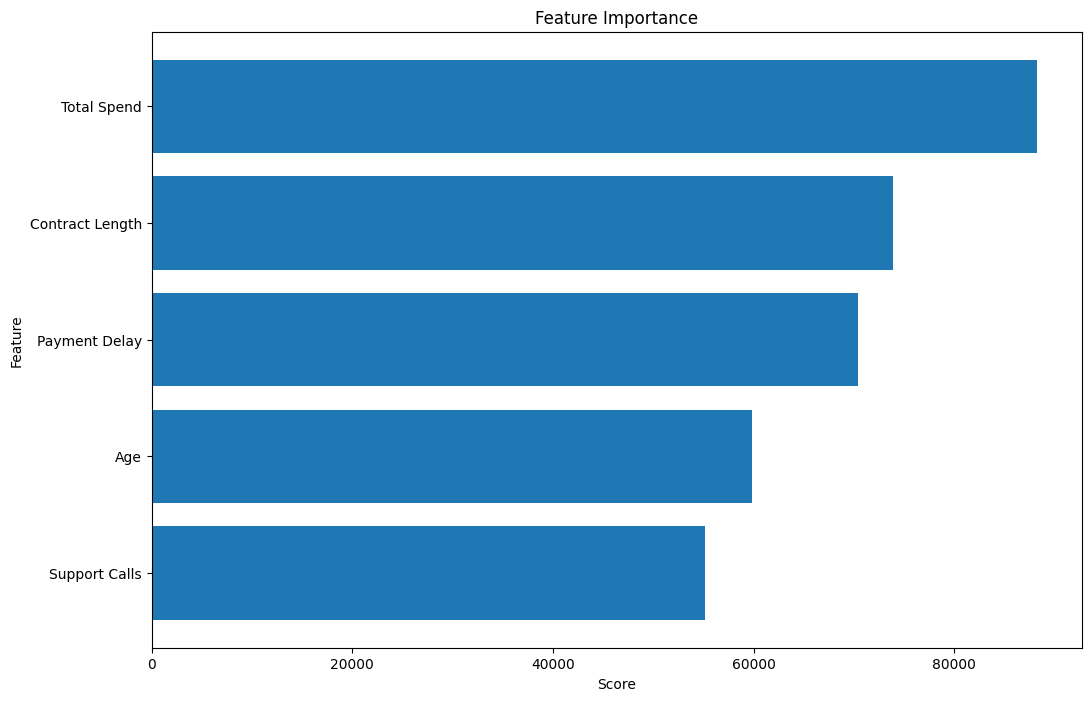

(('Total Spend', 'Contract Length', 'Payment Delay', 'Age', 'Support Calls'),
 (88276.3203125, 73900.109375, 70421.5859375, 59890.8125, 55202.3203125))

In [10]:
import matplotlib.pyplot as plt
# Feature importance

booster = best_model.get_booster()
feature_importance = booster.get_score(importance_type='cover')

#
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
feature_names, feature_scores = zip(*sorted_features)

#
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 這行是為了將最重要的特徵放在頂部
plt.show()
feature_names,feature_scores

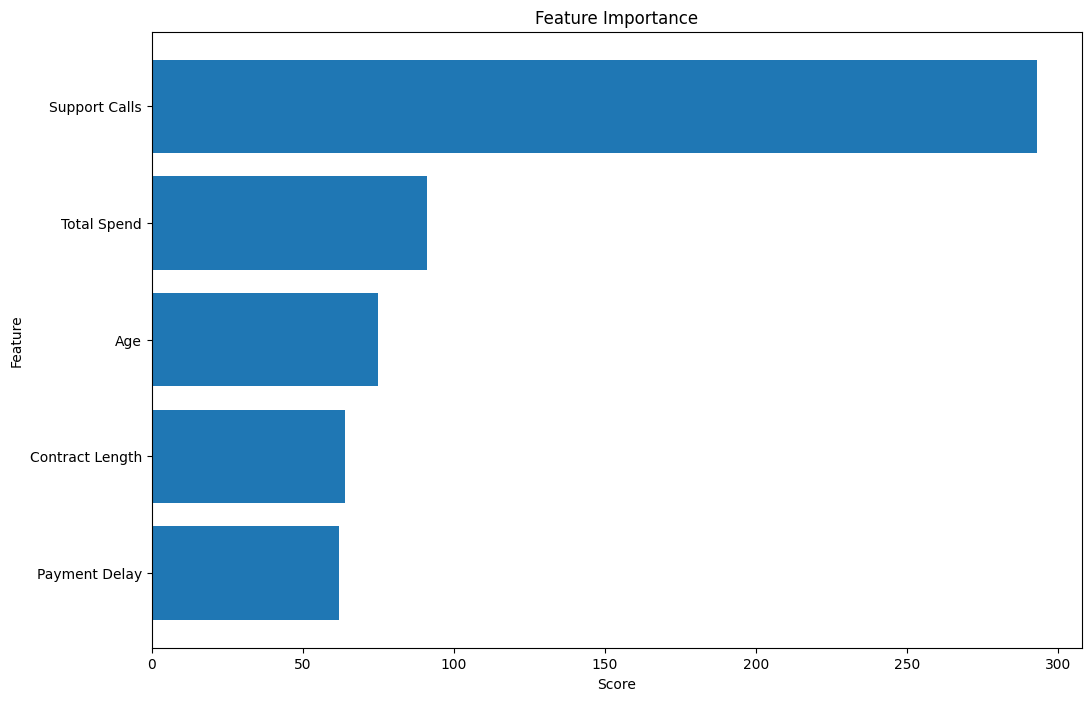

(('Support Calls', 'Total Spend', 'Age', 'Contract Length', 'Payment Delay'),
 (293.0, 91.0, 75.0, 64.0, 62.0))

In [11]:
import matplotlib.pyplot as plt

#
booster = best_model.get_booster()
feature_importance = booster.get_score(importance_type='weight')

#
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
feature_names, feature_scores = zip(*sorted_features)

#
plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_scores)
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

feature_names, feature_scores

In [12]:
import numpy as np
import shap
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_train)


#Get shap value summary
shap_values
result = [np.mean([abs(items[i]) for items in shap_values]) for i in range(len(shap_values[0]))]

#Get column name
X_train.columns
result
# DataFrame
df_train = pd.DataFrame({'Feature': X_train.columns, 'mean|shap value|': result})
sorted_df = df_train.sort_values(by='mean|shap value|',ascending=False)
# DataFrame
sorted_df

,Feature,mean|shap value|
4,Support Calls,0.852326
8,Total Spend,0.550979
7,Contract Length,0.298184
5,Payment Delay,0.278769
0,Age,0.250883
1,Gender,0.000000
2,Tenure,0.000000
3,Usage Frequency,0.000000
6,Subscription Type,0.000000
9,Last Interaction,0.000000


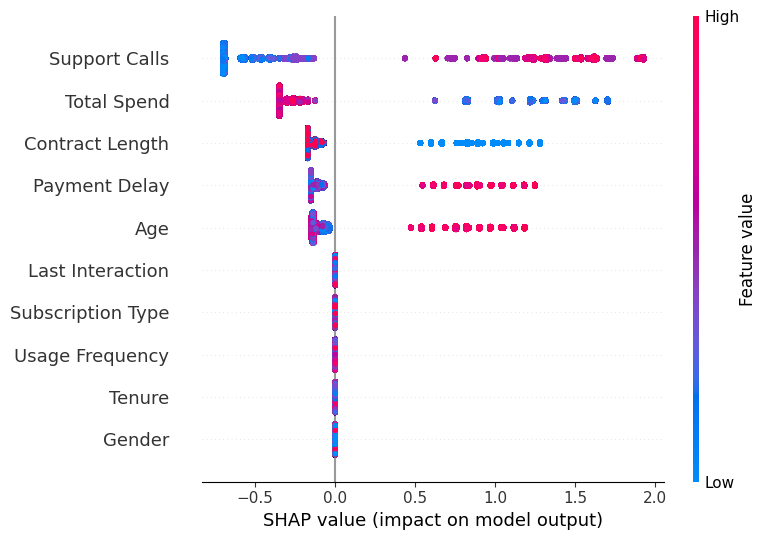

In [13]:
import numpy as np
import shap
import pandas as pd

# ... (your code to train the model, etc.)

# Assuming 'model' is your trained model
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_train)

# Plotting the SHAP values with a beeswarm plot
shap.summary_plot(shap_values, X_train,max_display=10,color="coolwarm",)

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# df = pd.read_csv(r'Customer-Churn-Records.csv')

df_train = pd.read_csv('Data/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')

subscription_map = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df_train['Subscription Type'] = df_train['Subscription Type'].map(subscription_map)
df_test['Subscription Type'] = df_test['Subscription Type'].map(subscription_map)

contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df_train['Contract Length'] = df_train['Contract Length'].map(contract_map)
df_test['Contract Length'] = df_test['Contract Length'].map(contract_map)

gender_map = {'Male': 0, 'Female': 1}
df_train['Gender'] = df_train['Gender'].map(gender_map)
df_test['Gender'] = df_test['Gender'].map(gender_map)

print("NaN counts:\n", df_train.isna().sum())
# print("NaN counts:\n", df_test.isna().sum())

df_train = df_train.dropna()
df_test = df_test.dropna()

print("NaN counts:\n", df_train.isna().sum())
print("NaN counts:\n", df_test.isna().sum())

y_train, y_test = df_train['Churn'], df_test['Churn']
X_train = df_train.drop(['Churn', 'CustomerID'], axis=1)
X_test = df_test.drop(['Churn', 'CustomerID'], axis=1)

# df = pd.DataFrame(df)
# label_encoder = LabelEncoder()

X_temp = pd.concat([X_train, y_train], axis=1)
X=X_temp[X_temp['Churn']==1]
X
#


NaN counts:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,1.0,39.0,14.0,5.0,18.0,1.0,12.0,932.00,17.0,1.0
1,65.0,1.0,49.0,1.0,10.0,8.0,0.0,1.0,557.00,6.0,1.0
2,55.0,1.0,14.0,4.0,6.0,18.0,0.0,3.0,185.00,3.0,1.0
3,58.0,0.0,38.0,21.0,7.0,7.0,1.0,1.0,396.00,29.0,1.0
4,23.0,0.0,32.0,20.0,5.0,8.0,0.0,1.0,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
253688,22.0,1.0,31.0,26.0,0.0,30.0,1.0,3.0,924.84,21.0,1.0
253689,61.0,0.0,38.0,19.0,4.0,5.0,1.0,3.0,303.69,27.0,1.0
253690,24.0,0.0,54.0,21.0,7.0,8.0,2.0,1.0,102.56,2.0,1.0
253691,56.0,0.0,42.0,30.0,9.0,7.0,2.0,12.0,337.81,20.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r'Customer-Churn-Records.csv')


#print(df_encoded.columns)
y = df['Exited'].astype(int)
#df_encoded = df.astype(float)
#df_encoded
#X=df_encoded.drop(['Churn'], axis=1)

df= df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score',
       'Point Earned']]

df = pd.DataFrame(df)

# LabelEncoder
label_encoder = LabelEncoder()


X=df.drop(['Exited'], axis=1)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_temp=pd.concat([X_temp,y_temp],axis=1)
X=X_temp[X_temp['Exited']==1]

X

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Exited
471,703,37,1,149762.08,1,0,20629.40,3,371,1
3046,658,31,3,133003.03,1,1,146339.27,3,879,1
3617,792,29,4,107601.79,1,0,18922.18,1,510,1
3114,619,40,10,0.00,1,1,147093.84,3,298,1
3146,548,28,8,116755.50,2,1,158585.17,1,519,1
...,...,...,...,...,...,...,...,...,...,...
2289,644,48,8,0.00,2,1,44965.54,4,930,1
3783,647,26,8,109958.15,1,1,136592.24,2,271,1
860,667,43,8,190227.46,1,0,97508.04,3,680,1
8147,642,39,8,128264.03,1,0,61792.76,1,280,1


In [ ]:
X.shape

(249999, 11)

In [15]:
X.dtypes

Xtofuzzy_Tri  = X[['Age','Gender','Tenure','Usage Frequency','Support Calls','Payment Delay','Subscription Type','Contract Length','Total Spend','Last Interaction']]

## Fuzzy Triangle & Gaussion



In [16]:
import pandas as pd

# Membership function
def triangular_mf(x, a, b, c):
    if x <= a:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return (c - x) / (c - b)
    else:
        return 0

# Maximal cardinality
def fuzzy_classification(x, min_val, median_val, max_val):
    low_membership = triangular_mf(x, min_val, min_val, median_val)
    medium_membership = triangular_mf(x, min_val, median_val, max_val)
    high_membership = triangular_mf(x, median_val, max_val, max_val)

    max_membership = max(low_membership, medium_membership, high_membership)

    if max_membership == low_membership:
        return 0
    elif max_membership == medium_membership:
        return 1
    else:
        return 2


fuzzy_df = pd.DataFrame()
# For each feature
for feature in Xtofuzzy_Tri.columns:
    min_val = Xtofuzzy_Tri[feature].min()
    median_val = Xtofuzzy_Tri[feature].quantile(0.5)
    max_val = Xtofuzzy_Tri[feature].max()

    fuzzy_df[f'{feature}_fuzzy'] = Xtofuzzy_Tri[feature].apply(lambda x: fuzzy_classification(x, min_val, median_val, max_val))

fuzzy_df

# Define a dict
boundaries = {}

for feature in Xtofuzzy_Tri.columns:
    min_val = Xtofuzzy_Tri[feature].min()
    median_val = Xtofuzzy_Tri[feature].quantile(0.5)
    max_val = Xtofuzzy_Tri[feature].max()

    # Save
    boundaries[feature] = (min_val, median_val, max_val)

# print out
for feature, bounds in boundaries.items():
    print(f"Feature: {feature}")
    print(f"Low boundary: {bounds[0]}, Medium boundary: {bounds[1]}, High boundary: {bounds[2]}")
    print("------")

fuzzy_df

Feature: Age
Low boundary: 18.0, Medium boundary: 42.0, High boundary: 65.0
------
Feature: Gender
Low boundary: 0.0, Medium boundary: 1.0, High boundary: 1.0
------
Feature: Tenure
Low boundary: 1.0, Medium boundary: 30.0, High boundary: 60.0
------
Feature: Usage Frequency
Low boundary: 1.0, Medium boundary: 15.0, High boundary: 30.0
------
Feature: Support Calls
Low boundary: 0.0, Medium boundary: 5.0, High boundary: 10.0
------
Feature: Payment Delay
Low boundary: 0.0, Medium boundary: 15.0, High boundary: 30.0
------
Feature: Subscription Type
Low boundary: 0.0, Medium boundary: 1.0, High boundary: 2.0
------
Feature: Contract Length
Low boundary: 1.0, Medium boundary: 3.0, High boundary: 12.0
------
Feature: Total Spend
Low boundary: 100.0, Medium boundary: 534.0, High boundary: 1000.0
------
Feature: Last Interaction
Low boundary: 1.0, Medium boundary: 16.0, High boundary: 30.0
------


,Age_fuzzy,Gender_fuzzy,Tenure_fuzzy,Usage Frequency_fuzzy,Support Calls_fuzzy,Payment Delay_fuzzy,Subscription Type_fuzzy,Contract Length_fuzzy,Total Spend_fuzzy,Last Interaction_fuzzy
0,0,1,1,1,1,1,1,2,2,1
1,2,1,2,0,2,1,0,0,1,0
2,2,1,0,0,1,1,0,1,0,0
3,2,0,1,1,1,0,1,0,1,2
4,0,0,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
253688,0,1,1,2,0,2,1,1,2,1
253689,2,0,1,1,1,0,1,1,0,2
253690,0,0,2,1,1,1,2,0,0,0
253691,2,0,1,2,2,0,2,2,1,1


In [17]:
import pandas as pd
df_encoded=fuzzy_df
fuzzy_columns = [col for col in df_encoded.columns]

# one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=fuzzy_columns)

#
for col in fuzzy_columns:
    mappings = {
        f"{col}_{i}": f"{col}_{i}" for i in range(3)
    }
    df_encoded.rename(columns=mappings, inplace=True)
df_encoded.columns

Index(['Age_fuzzy_0', 'Age_fuzzy_1', 'Age_fuzzy_2', 'Gender_fuzzy_0',
       'Gender_fuzzy_1', 'Tenure_fuzzy_0', 'Tenure_fuzzy_1', 'Tenure_fuzzy_2',
       'Usage Frequency_fuzzy_0', 'Usage Frequency_fuzzy_1',
       'Usage Frequency_fuzzy_2', 'Support Calls_fuzzy_0',
       'Support Calls_fuzzy_1', 'Support Calls_fuzzy_2',
       'Payment Delay_fuzzy_0', 'Payment Delay_fuzzy_1',
       'Payment Delay_fuzzy_2', 'Subscription Type_fuzzy_0',
       'Subscription Type_fuzzy_1', 'Subscription Type_fuzzy_2',
       'Contract Length_fuzzy_0', 'Contract Length_fuzzy_1',
       'Contract Length_fuzzy_2', 'Total Spend_fuzzy_0', 'Total Spend_fuzzy_1',
       'Total Spend_fuzzy_2', 'Last Interaction_fuzzy_0',
       'Last Interaction_fuzzy_1', 'Last Interaction_fuzzy_2'],
      dtype='object')

In [18]:
# Initialize dictionary to store dataset
dataset = {}

# Convert to transaction dataset
transaction_id = 1
for _, row in df_encoded.iterrows():
    transaction = {}
    for column, value in row.items():
        transaction[column] = value
    transaction_key = f'transaction{transaction_id}'
    dataset[transaction_key] = transaction
    transaction_id += 1

In [19]:
transactions = dataset

filtered_transactions = {transaction: {key: value for key, value in items.items() if value != 0}
                        for transaction, items in transactions.items()}

filtered_transactions

{'transaction1': {'Age_fuzzy_0': True,
  'Gender_fuzzy_1': True,
  'Tenure_fuzzy_1': True,
  'Usage Frequency_fuzzy_1': True,
  'Support Calls_fuzzy_1': True,
  'Payment Delay_fuzzy_1': True,
  'Subscription Type_fuzzy_1': True,
  'Contract Length_fuzzy_2': True,
  'Total Spend_fuzzy_2': True,
  'Last Interaction_fuzzy_1': True},
 'transaction2': {'Age_fuzzy_2': True,
  'Gender_fuzzy_1': True,
  'Tenure_fuzzy_2': True,
  'Usage Frequency_fuzzy_0': True,
  'Support Calls_fuzzy_2': True,
  'Payment Delay_fuzzy_1': True,
  'Subscription Type_fuzzy_0': True,
  'Contract Length_fuzzy_0': True,
  'Total Spend_fuzzy_1': True,
  'Last Interaction_fuzzy_0': True},
 'transaction3': {'Age_fuzzy_2': True,
  'Gender_fuzzy_1': True,
  'Tenure_fuzzy_0': True,
  'Usage Frequency_fuzzy_0': True,
  'Support Calls_fuzzy_1': True,
  'Payment Delay_fuzzy_1': True,
  'Subscription Type_fuzzy_0': True,
  'Contract Length_fuzzy_1': True,
  'Total Spend_fuzzy_0': True,
  'Last Interaction_fuzzy_0': True},
 'tr

## High Utility fuzzy Churn Patterns

In [20]:
import time

def extract_base_name(fuzzy_name):
    if fuzzy_name.startswith("Status_"):
        return "Status"
    elif fuzzy_name.startswith("Age Group_"):
        return "Age Group"
    elif fuzzy_name.startswith("Tariff Plan_"):
        return "Tariff Plan"
    elif "fuzzy" in fuzzy_name:
        return fuzzy_name.split("_", 1)[0]
    else:
        return fuzzy_name

def calculate_utility(itemset, transactions, profit_table):
    total_utility = 0
    for transaction in transactions.values():
        if set(itemset).issubset(set(transaction.keys())):
            for item, utility in transaction.items():
                if item in itemset:
                    base_name = extract_base_name(item)
                    total_utility += utility * profit_table.get(base_name, 0)
    return total_utility

def find_top_k_high_utility_itemsets(transactions, profit_table, k):
    itemsets = set()
    for transaction in transactions.values():
        itemsets.update(transaction.keys())

    high_utility_itemsets = {}
    for item in itemsets:
        utility = calculate_utility([item], transactions, profit_table)
        if utility > 0:
            high_utility_itemsets[(item,)] = utility

    P_itemsets = {}
    while True:
        temp_itemsets = {}
        for itemset, utility in high_utility_itemsets.items():
            for item in itemsets:
                if item not in itemset:
                    new_itemset = tuple(sorted(list(itemset) + [item]))
                    new_utility = calculate_utility(new_itemset, transactions, profit_table)
                    if new_utility > 0:
                        temp_itemsets[new_itemset] = new_utility
                        P_itemsets[new_itemset] = new_utility

        if not temp_itemsets:
            break

        sorted_itemsets = sorted(temp_itemsets.items(), key=lambda x: x[1], reverse=True)
        top_k_itemsets = sorted_itemsets[:k]
        high_utility_itemsets = {itemset: utility for itemset, utility in top_k_itemsets}

    return high_utility_itemsets, P_itemsets

# # 測試數據

# k = 10

# # 記錄開始時間
# start_time = time.time()

# # 執行函數
# result = find_top_k_high_utility_itemsets(filtered_transactions, profit_table, k)

# # 記錄結束時間
# end_time = time.time()

# # 計算執行時間
# execution_time = end_time - start_time
# print(f"程式執行時間: {execution_time:.6f} 秒")
# result

In [21]:
# SHAP

# Feature	mean|shap value|
# 4	Support Calls	1.126040
# 8	Total Spend	0.878605
# 7	Contract Length	0.595631
# 5	Payment Delay	0.567857
# 0	Age	0.513372
# 9	Last Interaction	0.009213
# 1	Gender	0.008771
# 3	Usage Frequency	0.000000
# 2	Tenure	0.000000
# 6	Subscription Type	0.000000
profit_table = {
   "Support Calls":1.126040,
    "Total Spend": 0.878605,
    "Contract Length": 0.595631,
    "Payment Delay": 0.567857,
    "Age": 0.513372,
    "Last Interaction": 0.009213,
    "Gender": 0.008771,
    "Usage Frequency": 0.000000,
    "Tenure":0.000000,
    "Subscription Type":0.000000
}

start_time = time.time()
# 取得前2個高效用項目集
result,P_itemsets= find_top_k_high_utility_itemsets(filtered_transactions, profit_table, 3)

#print(P_itemsets)
sorted_data = sorted(P_itemsets.items(), key=lambda x: x[1], reverse=True)

# Top 10
top_10 = sorted_data[:10]
top_10 = {itemset: value for itemset, value in top_10}
#print(top_10)
print("Top 10 High Utility Itemsets:")
for itemset, utility in top_10.items():
    print(itemset, "-> Utility:", round(utility,0))


end_time = time.time()
# 計算執行時間
execution_time = end_time - start_time
print(f"程式執行時間: {execution_time:.6f} 秒")


Top 10 High Utility Itemsets:
('Support Calls_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 115439.0
('Payment Delay_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 94370.0
('Age_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 88866.0
('Payment Delay_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 86734.0
('Age_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 81575.0
('Support Calls_fuzzy_2', 'Total Spend_fuzzy_1') -> Utility: 71333.0
('Payment Delay_fuzzy_1', 'Support Calls_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 71060.0
('Contract Length_fuzzy_0', 'Support Calls_fuzzy_1') -> Utility: 68016.0
('Age_fuzzy_1', 'Support Calls_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 67916.0
('Gender_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 66110.0
程式執行時間: 119.947624 秒


## High Utility Length=3

In [22]:
def find_top_k_high_utility_itemsets(transactions, profit_table, k, desired_length):
    """
    找出前K個高效用項目集
    """
    itemsets = set()
    for transaction in transactions.values():
        # 將交易中的每個項目加入項目集
        itemsets.update(transaction.keys())

    # 儲存高效用項目集及其效用總和
    high_utility_itemsets = {}
    P_itemsets = {}

    for item in itemsets:
        # 計算單一項目的效用總和
        utility = calculate_utility([item], transactions, profit_table)
        if utility > 0:
            high_utility_itemsets[(item,)] = utility

    while True:
        temp_itemsets = {}
        for itemset, utility in high_utility_itemsets.items():
            for item in itemsets:
                if item not in itemset:
                    new_itemset = tuple(sorted(list(itemset) + [item]))
                    new_utility = calculate_utility(new_itemset, transactions, profit_table)
                    if new_utility > 0 and len(new_itemset) <= desired_length:
                        temp_itemsets[new_itemset] = new_utility
                        P_itemsets[new_itemset] = new_utility

        # 若 temp_itemsets 為空，停止迭代
        if not temp_itemsets:
            break

        # 選取前K個高效用項目集
        sorted_itemsets = sorted(temp_itemsets.items(), key=lambda x: x[1], reverse=True)
        top_k_itemsets = sorted_itemsets[:k]
        high_utility_itemsets = {itemset: utility for itemset, utility in top_k_itemsets}

    return high_utility_itemsets, P_itemsets

In [23]:
# SHAP
profit_table = {
   "Support Calls":1.126040,
    "Total Spend": 0.878605,
    "Contract Length": 0.595631,
    "Payment Delay": 0.567857,
    "Age": 0.513372,
    "Last Interaction": 0.009213,
    "Gender": 0.008771,
    "Usage Frequency": 0.000000,
    "Tenure":0.000000,
    "Subscription Type":0.000000
}

# 取得前2個高效用項目集
result,P_itemsets= find_top_k_high_utility_itemsets(filtered_transactions, profit_table, 3,2)

# 輸出結果
#print(P_itemsets)
# 使用sorted函式將字典按數值降序排序
sorted_data = sorted(P_itemsets.items(), key=lambda x: x[1], reverse=True)

# 取得前5名的資料
top_10 = sorted_data[:10]
top_10 = {itemset: value for itemset, value in top_10}
#print(top_3)
print("Top 10 High Utility Itemsets:")
for itemset, utility in top_10.items():
    print(itemset, "-> Utility:", round(utility,0))

Top 10 High Utility Itemsets:
('Support Calls_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 115439.0
('Payment Delay_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 94370.0
('Age_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 88866.0
('Payment Delay_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 86734.0
('Age_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 81575.0
('Support Calls_fuzzy_2', 'Total Spend_fuzzy_1') -> Utility: 71333.0
('Contract Length_fuzzy_0', 'Support Calls_fuzzy_1') -> Utility: 68016.0
('Gender_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 66110.0
('Last Interaction_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 65695.0
('Contract Length_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 65670.0


## Validation

In [24]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# df = pd.read_csv(r'Customer-Churn-Records.csv')

# df_train = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
# df_test = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')




# y = df['Exited'].astype(int)


# df= df[['CreditScore', 'Age', 'Tenure', 'Balance',
#        'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
#        'Exited', 'Satisfaction Score',
#        'Point Earned']]

# df = pd.DataFrame(df)

# # LabelEncoder
# label_encoder = LabelEncoder()

# X=df.drop(['Exited'], axis=1)
df_train = pd.read_csv('Data/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')

subscription_map = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df_train['Subscription Type'] = df_train['Subscription Type'].map(subscription_map)
df_test['Subscription Type'] = df_test['Subscription Type'].map(subscription_map)

contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df_train['Contract Length'] = df_train['Contract Length'].map(contract_map)
df_test['Contract Length'] = df_test['Contract Length'].map(contract_map)

gender_map = {'Male': 0, 'Female': 1}
df_train['Gender'] = df_train['Gender'].map(gender_map)
df_test['Gender'] = df_test['Gender'].map(gender_map)

print("NaN counts:\n", df_train.isna().sum())
# print("NaN counts:\n", df_test.isna().sum())

df_train = df_train.dropna()
df_test = df_test.dropna()

print("NaN counts:\n", df_train.isna().sum())
print("NaN counts:\n", df_test.isna().sum())

y_train, y_test = df_train['Churn'], df_test['Churn']
X_train = df_train.drop(['Churn', 'CustomerID'], axis=1)
X_test = df_test.drop(['Churn', 'CustomerID'], axis=1)


fuzzy_df = pd.DataFrame()
# Fuzzy classification
for feature in Xtofuzzy_Tri.columns:
    min_val = Xtofuzzy_Tri[feature].min()
    median_val = Xtofuzzy_Tri[feature].quantile(0.5)
    max_val = Xtofuzzy_Tri[feature].max()

    fuzzy_df[f'{feature}_fuzzy'] = Xtofuzzy_Tri[feature].apply(lambda x: fuzzy_classification(x, min_val, median_val, max_val))


df_fuzzy = pd.concat([fuzzy_df],axis=1)

fuzzy_columns = [col for col in df_fuzzy.columns]

# one-hot encoding
df_fuzzy = pd.get_dummies(df_fuzzy, columns=fuzzy_columns)
df_fuzzy =df_fuzzy.astype(int)
df_fuzzy

NaN counts:
 CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64
NaN counts:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


,Age_fuzzy_0,Age_fuzzy_1,Age_fuzzy_2,Gender_fuzzy_0,Gender_fuzzy_1,Tenure_fuzzy_0,Tenure_fuzzy_1,Tenure_fuzzy_2,Usage Frequency_fuzzy_0,Usage Frequency_fuzzy_1,...,Subscription Type_fuzzy_2,Contract Length_fuzzy_0,Contract Length_fuzzy_1,Contract Length_fuzzy_2,Total Spend_fuzzy_0,Total Spend_fuzzy_1,Total Spend_fuzzy_2,Last Interaction_fuzzy_0,Last Interaction_fuzzy_1,Last Interaction_fuzzy_2
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253688,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
253689,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
253690,1,0,0,1,0,0,0,1,0,1,...,1,1,0,0,1,0,0,1,0,0
253691,0,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r'Customer-Churn-Records.csv')


#print(df_encoded.columns)
y = df['Exited'].astype(int)
#df_encoded = df.astype(float)
#df_encoded
#X=df_encoded.drop(['Churn'], axis=1)

df= df[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'EstimatedSalary',
       'Exited', 'Satisfaction Score',
       'Point Earned']]

df = pd.DataFrame(df)

# LabelEncoder
label_encoder = LabelEncoder()



df

import pandas as pd
from sklearn.preprocessing import LabelEncoder
# df = pd.read_csv(r'Customer-Churn-Records.csv')

df_train = pd.read_csv('Data/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')

subscription_map = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df_train['Subscription Type'] = df_train['Subscription Type'].map(subscription_map)
df_test['Subscription Type'] = df_test['Subscription Type'].map(subscription_map)

contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df_train['Contract Length'] = df_train['Contract Length'].map(contract_map)
df_test['Contract Length'] = df_test['Contract Length'].map(contract_map)

gender_map = {'Male': 0, 'Female': 1}
df_train['Gender'] = df_train['Gender'].map(gender_map)
df_test['Gender'] = df_test['Gender'].map(gender_map)

print("NaN counts:\n", df_train.isna().sum())
# print("NaN counts:\n", df_test.isna().sum())

df_train = df_train.dropna()
df_test = df_test.dropna()

print("NaN counts:\n", df_train.isna().sum())
print("NaN counts:\n", df_test.isna().sum())

y_train, y_test = df_train['Churn'], df_test['Churn']
X_train = df_train.drop(['Churn', 'CustomerID'], axis=1)
X_test = df_test.drop(['Churn', 'CustomerID'], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,101348.88,1,2,464
1,608,41,1,83807.86,1,0,112542.58,0,3,456
2,502,42,8,159660.80,3,1,113931.57,1,3,377
3,699,39,1,0.00,2,0,93826.63,0,5,350
4,850,43,2,125510.82,1,1,79084.10,0,5,425
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,96270.64,0,1,300
9996,516,35,10,57369.61,1,1,101699.77,0,5,771
9997,709,36,7,0.00,1,0,42085.58,1,3,564
9998,772,42,3,75075.31,2,1,92888.52,1,2,339


In [ ]:
#Top 10 patterns


('Age_fuzzy_1', 'NumOfProducts_fuzzy_0') -> Utility: 2012.0
('Age_fuzzy_1', 'CreditScore_fuzzy_1', 'NumOfProducts_fuzzy_0') -> Utility: 1725.0
('Age_fuzzy_1', 'Balance_fuzzy_1', 'NumOfProducts_fuzzy_0') -> Utility: 1713.0
('Age_fuzzy_1', 'IsActiveMember_fuzzy_0', 'NumOfProducts_fuzzy_0') -> Utility: 1650.0
('Age_fuzzy_1', 'Balance_fuzzy_1') -> Utility: 1496.0
('Age_fuzzy_1', 'CreditScore_fuzzy_1') -> Utility: 1487.0
('Age_fuzzy_1', 'IsActiveMember_fuzzy_0') -> Utility: 1469.0
('Age_fuzzy_1', 'Balance_fuzzy_1', 'CreditScore_fuzzy_1', 'NumOfProducts_fuzzy_0') -> Utility: 1438.0
('Age_fuzzy_1', 'CreditScore_fuzzy_1', 'IsActiveMember_fuzzy_0', 'NumOfProducts_fuzzy_0') -> Utility: 1377.0
('Age_fuzzy_1', 'Balance_fuzzy_1', 'IsActiveMember_fuzzy_0', 'NumOfProducts_fuzzy_0') -> Utility: 1366.0


Top 10 High Utility Itemsets:
('Support Calls_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 115439.0
('Payment Delay_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 94370.0
('Age_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 88866.0
('Payment Delay_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 86734.0
('Age_fuzzy_1', 'Total Spend_fuzzy_1') -> Utility: 81575.0
('Support Calls_fuzzy_2', 'Total Spend_fuzzy_1') -> Utility: 71333.0
('Contract Length_fuzzy_0', 'Support Calls_fuzzy_1') -> Utility: 68016.0
('Gender_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 66110.0
('Last Interaction_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 65695.0
('Contract Length_fuzzy_1', 'Support Calls_fuzzy_1') -> Utility: 65670.0

SyntaxError: invalid syntax (4087377154.py, line 4)

In [27]:
X = pd.merge(df, df_fuzzy, left_index=True, right_index=True, how='left')
# X['fuzzyp1']=X['Age_fuzzy_1']*X['NumOfProducts_fuzzy_0']
# X['fuzzyp2']=X['Age_fuzzy_1']*X['CreditScore_fuzzy_1']*X['NumOfProducts_fuzzy_0']
# X['fuzzyp3']=X['Age_fuzzy_1']*X['Balance_fuzzy_1']*X['NumOfProducts_fuzzy_0']
# X['fuzzyp4']=X['Age_fuzzy_1']*X['NumOfProducts_fuzzy_0']*X['IsActiveMember_fuzzy_0']
# X['fuzzyp5']=X['Age_fuzzy_1']*X['Balance_fuzzy_1']
# X['fuzzyp6']=X['Age_fuzzy_1']*X['CreditScore_fuzzy_1']
# X['fuzzyp7']=X['Age_fuzzy_1']*X['IsActiveMember_fuzzy_0']
# X['fuzzyp8']=X['Age_fuzzy_1']*X['Balance_fuzzy_1']*X['CreditScore_fuzzy_1']*X['NumOfProducts_fuzzy_0']
# X['fuzzyp9']=X['Age_fuzzy_1']*X['CreditScore_fuzzy_1']*X['IsActiveMember_fuzzy_0']*X['NumOfProducts_fuzzy_0']
# X['fuzzyp10']=X['Age_fuzzy_1']*X['Balance_fuzzy_1']*X['IsActiveMember_fuzzy_0']*X['NumOfProducts_fuzzy_0']
X['fuzzyp1']=X['Support Calls_fuzzy_1']*X['Total Spend_fuzzy_1']
X['fuzzyp2']=X['Payment Delay_fuzzy_1']*X['Support Calls_fuzzy_1']
X['fuzzyp3']=X['Age_fuzzy_1']*X['Support Calls_fuzzy_1']
X['fuzzyp4']=X['Payment Delay_fuzzy_1']*X['Total Spend_fuzzy_1']
X['fuzzyp5']=X['Age_fuzzy_1']*X['Total Spend_fuzzy_1']
X['fuzzyp6']=X['Support Calls_fuzzy_2']*X['Total Spend_fuzzy_1']
X['fuzzyp7']=X['Contract Length_fuzzy_0']*X['Support Calls_fuzzy_1']
X['fuzzyp8']=X['Gender_fuzzy_1']*X['Support Calls_fuzzy_1']
X['fuzzyp9']=X['Last Interaction_fuzzy_1']*X['Support Calls_fuzzy_1']
X['fuzzyp10']=X['Contract Length_fuzzy_1']*X['Support Calls_fuzzy_1']

X = X.drop(['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'EstimatedSalary','Satisfaction Score',
       'Point Earned', 'Exited', 'Support Calls_fuzzy_0', 'Total Spend_fuzzy_0',
       'Payment Delay_fuzzy_0', 'Age_fuzzy_0', 'Age_fuzzy_2',
       'Payment Delay_fuzzy_2', 'Total Spend_fuzzy_2', 'Support Calls_fuzzy_2',
       'Contract Length_fuzzy_0', 'Contract Length_fuzzy_1', 'Contract Length_fuzzy_2'], axis=1)

#*X['Subscription  Length_fuzzy_1']*X['Tariff Plan_1']
#X=X[X['fuzzyp']==0]
#y=X[X['CHURN','fuzzyp']]
# X=X.drop(['CreditScore_fuzzy_0', 'CreditScore_fuzzy_1', 'CreditScore_fuzzy_2',
#        'Age_fuzzy_0', 'Age_fuzzy_1', 'Age_fuzzy_2', 'Tenure_fuzzy_0',
#        'Tenure_fuzzy_1', 'Tenure_fuzzy_2', 'Balance_fuzzy_0',
#        'Balance_fuzzy_1', 'Balance_fuzzy_2', 'NumOfProducts_fuzzy_0',
#        'NumOfProducts_fuzzy_1', 'NumOfProducts_fuzzy_2',
#        'IsActiveMember_fuzzy_0', 'IsActiveMember_fuzzy_2',
#        'EstimatedSalary_fuzzy_0', 'EstimatedSalary_fuzzy_1',
#        'EstimatedSalary_fuzzy_2',
#        'Satisfaction Score_fuzzy_0', 'Satisfaction Score_fuzzy_1',
#        'Satisfaction Score_fuzzy_2', 'Point Earned_fuzzy_0',
#        'Point Earned_fuzzy_1', 'Point Earned_fuzzy_2','Exited'],axis=1)
X = X.fillna(0)
X

NameError: name 'df' is not defined

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import optuna
# 記錄整個運行開始時間
overall_start_time = time.time()
# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



# 應用 SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 計算 scale_pos_weight
#scale_pos_weight = sum(y_resampled == 0) / sum(y_resampled == 1)

def objective(trial):
    """Optuna 目標函數，用於尋找最佳超參數。"""
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)

    model = xgb.XGBClassifier(
        objective='binary:logistic',
       # scale_pos_weight=scale_pos_weight,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        verbosity=0,
        use_label_encoder=False
    )

    model.fit(X_resampled, y_resampled)
    y_prob = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_prob)

# 記錄超參數搜索開始時間
start_time = time.time()

# 設定 Optuna 進行超參數搜尋
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)  # 設定嘗試 50 次

# 記錄超參數搜索結束時間
end_time = time.time()

# 計算超參數搜索運行時間
total_time = end_time - start_time
print(f"超參數搜索運行時間: {total_time:.2f} 秒")

# 獲取最佳超參數
best_params = study.best_params
print("最佳超參數:", best_params)

# 使用最佳超參數重新訓練模型
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    #scale_pos_weight=scale_pos_weight,
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    verbosity=0,
    use_label_encoder=False
)
best_model.fit(X_resampled, y_resampled)

# 進行預測
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# 計算指標
auc_score = roc_auc_score(y_test, y_prob)
print("AUC:", auc_score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 記錄整個運行結束時間
overall_end_time = time.time()

# 計算整個運行時間
overall_total_time = overall_end_time - overall_start_time
print(f"整個運行時間: {overall_total_time:.2f} 秒")


[I 2025-04-15 06:49:52,421] A new study created in memory with name: no-name-d78633dc-0f32-40e0-988e-0b54efa5107f
[I 2025-04-15 06:49:52,617] Trial 0 finished with value: 0.9399494260954381 and parameters: {'max_depth': 3, 'learning_rate': 0.06370228071740089, 'n_estimators': 427}. Best is trial 0 with value: 0.9399494260954381.
[I 2025-04-15 06:49:52,746] Trial 1 finished with value: 0.9404149466947245 and parameters: {'max_depth': 3, 'learning_rate': 0.05820817943426228, 'n_estimators': 324}. Best is trial 1 with value: 0.9404149466947245.
[I 2025-04-15 06:49:52,902] Trial 2 finished with value: 0.9339673280542664 and parameters: {'max_depth': 10, 'learning_rate': 0.26249388031274445, 'n_estimators': 131}. Best is trial 1 with value: 0.9404149466947245.
[I 2025-04-15 06:49:53,309] Trial 3 finished with value: 0.928338328971057 and parameters: {'max_depth': 8, 'learning_rate': 0.24367057470072168, 'n_estimators': 447}. Best is trial 1 with value: 0.9404149466947245.
[I 2025-04-15 06:4

超參數搜索運行時間: 39.68 秒
最佳超參數: {'max_depth': 9, 'learning_rate': 0.016240507737411355, 'n_estimators': 101}
AUC: 0.9522920555901265
Accuracy: 0.947
Precision: 0.9674267100977199
Recall: 0.7557251908396947
F1 Score: 0.8485714285714285
Matthews Correlation Coefficient: 0.8261893332560002

Confusion Matrix:
[[1597   10]
 [  96  297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1607
           1       0.97      0.76      0.85       393

    accuracy                           0.95      2000
   macro avg       0.96      0.87      0.91      2000
weighted avg       0.95      0.95      0.94      2000

整個運行時間: 39.94 秒


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, matthews_corrcoef, confusion_matrix, classification_report)

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summarize class distribution
print("Before SMOTE: ", dict(zip(*np.unique(y_train, return_counts=True))))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Summarize the new class distribution
print("After SMOTE: ", dict(zip(*np.unique(y_resampled, return_counts=True))))

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the resampled dataset
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier

y_prob = rf_classifier.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_prob)




# 評估模型
print("AUC:", auc_score)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE:  {0: 6355, 1: 1645}
After SMOTE:  {0: 6355, 1: 6355}
AUC: 0.9444550004671041
Accuracy: 0.9455
Precision: 0.9640522875816994
Recall: 0.7506361323155216
F1 Score: 0.844062947067239
Matthews Correlation Coefficient: 0.8209898023726958

Confusion Matrix:
[[1596   11]
 [  98  295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1607
           1       0.96      0.75      0.84       393

    accuracy                           0.95      2000
   macro avg       0.95      0.87      0.91      2000
weighted avg       0.95      0.95      0.94      2000

